# 2) SENTIMENT ANALYSIS OF FINANCIAL DATA

In [ ]:
import pandas as pd
data=pd.read_csv("/content/financial.csv",encoding ="ISO-8859-1")

In [ ]:
column_names=['review','text']
data=pd.read_csv("/content/financial.csv",names=column_names,encoding ="ISO-8859-1")
data.head()

,review,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
data.isnull().sum()

review    0
text      0
dtype: int64

In [ ]:
data['review'].value_counts()

review
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

# Text preprocessing

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
port_stem=PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
def stemming(content):
    words = word_tokenize(content)
    stemmed_words = [port_stem.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    stemmed_content = ' '.join(stemmed_words)
    return stemmed_content

In [ ]:
data['stemmed_content']=data['text'].apply(stemming)
data['stemmed_content']

0       accord gran compani plan move product russia a...
1       technopoli plan develop stage area less squar ...
2       intern electron industri compani elcoteq laid ...
3       new product plant compani would increas capac ...
4       accord compani updat strategi year baswar targ...
                              ...                        
4841    london marketwatch share price end lower londo...
4842    rinkuskiai beer sale fell per cent million lit...
4843    oper profit fell eur mn eur mn includ vessel s...
4844    net sale paper segment decreas eur mn second q...
4845    sale finland decreas januari sale outsid finla...
Name: stemmed_content, Length: 4846, dtype: object

In [ ]:
sentiment_mapping = {'neutral': 0, 'negative': -1, 'positive': 1}
data['review_numerical']= data['review'].map(sentiment_mapping)
data['review_numerical'].head(10)

0    0
1    0
2   -1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: review_numerical, dtype: int64

In [ ]:
x=data['stemmed_content'].values
y=data['review_numerical'].values

# Data splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

# Text vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [ ]:
from collections import Counter

# Assuming y_test is your list of labels
counter = Counter(y_test)

# Print counts of each unique value
for label, count in counter.items():
    print(f"{label}: {count}")


0: 576
1: 273
-1: 121


# Model training using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
x_train_prediction=model.predict(x_train)
training_data_accuracy = accuracy_score(y_train ,x_train_prediction )
print("training accuracy:",training_data_accuracy)

training accuracy: 0.8457172342621259


In [ ]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test ,x_test_prediction )
print("testing accuracy :" ,testing_data_accuracy)

testing accuracy : 0.7319587628865979


# Confusion Matrix

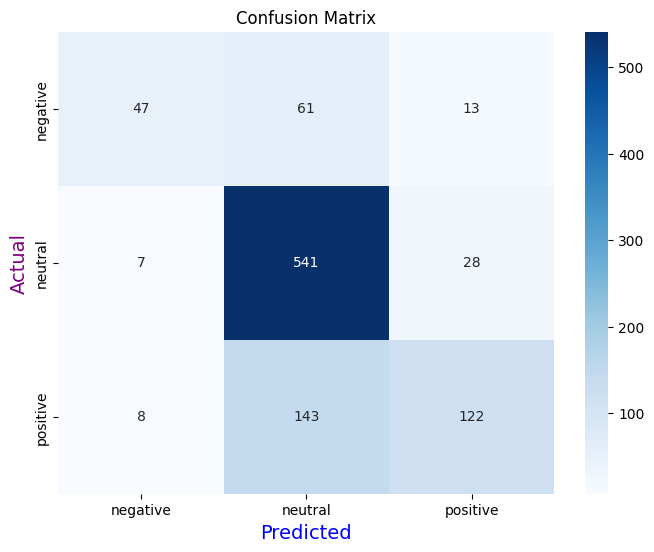

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
class_labels = ['negative', 'neutral','positive']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()

# Model training using Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

# Accuracy

In [ ]:
x_train_prediction=clf.predict(x_train)
training_data_accuracy = accuracy_score(y_train ,x_train_prediction )
print("training accuracy:",training_data_accuracy)

training accuracy: 0.7342621259029928


In [ ]:
x_test_prediction=clf.predict(x_test)
test_data_accuracy = accuracy_score(y_test ,x_test_prediction )
print( "testing accuracy:",test_data_accuracy)

testing accuracy: 0.6793814432989691


# Confusion Matrix

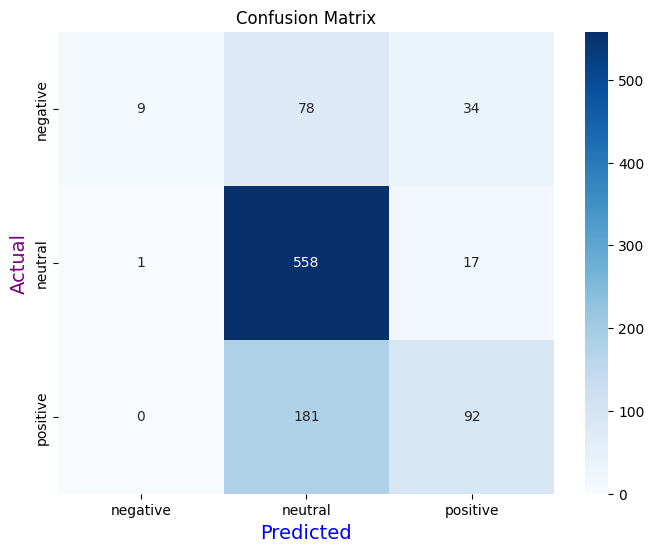

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_predicted = clf.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
class_labels = ['negative', 'neutral','positive']
cmap = sns.diverging_palette(220, 20, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize=14, color='blue')
plt.ylabel('Actual', fontsize=14, color='purple')
plt.title('Confusion Matrix')
plt.show()